In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIR_PATH = '/content/drive/MyDrive/Data_Science_Club_PJATK/predykcja-analiza-cen-aut'

In [3]:
df_original = pd.read_csv(DIR_PATH + '/sales_ads_train.csv')
df_mostlyai = pd.read_csv(DIR_PATH + '/synthetic_training_data_mostlyai_pl.csv')
df_sdv = pd.read_csv(DIR_PATH + '/synthetic_training_data_sdv_pl.csv')
df_test = pd.read_csv(DIR_PATH + '/sales_ads_test.csv')

In [4]:
numerical_features = [
    "Cena",
    "Rok_produkcji",
    "Przebieg_km",
    "Moc_KM",
    "Pojemnosc_cm3",
    "Emisja_CO2",
    "Liczba_drzwi"
]

In [5]:
categorical_columns = [
    "Waluta",
    "Stan",
    "Rodzaj_paliwa",
    "Naped",
    "Skrzynia_biegow",
    "Typ_nadwozia",
    "Liczba_drzwi",
    "Kolor"
]

# Coefficient matrices

### df_original
`Moc_KM`, `Pojemnosc_cm3`, and `Emisja_CO2`  are all strongly positively correlated with each other and with `Cena`, indicating that vehicles with bigger engines and higher power also emit more CO2 and command higher prices.

Meanwhile, there is a significant negative correlation between `Rok_produkcji` and `Przebieg_km`, suggesting that older vehicles have typically covered more kilometers.

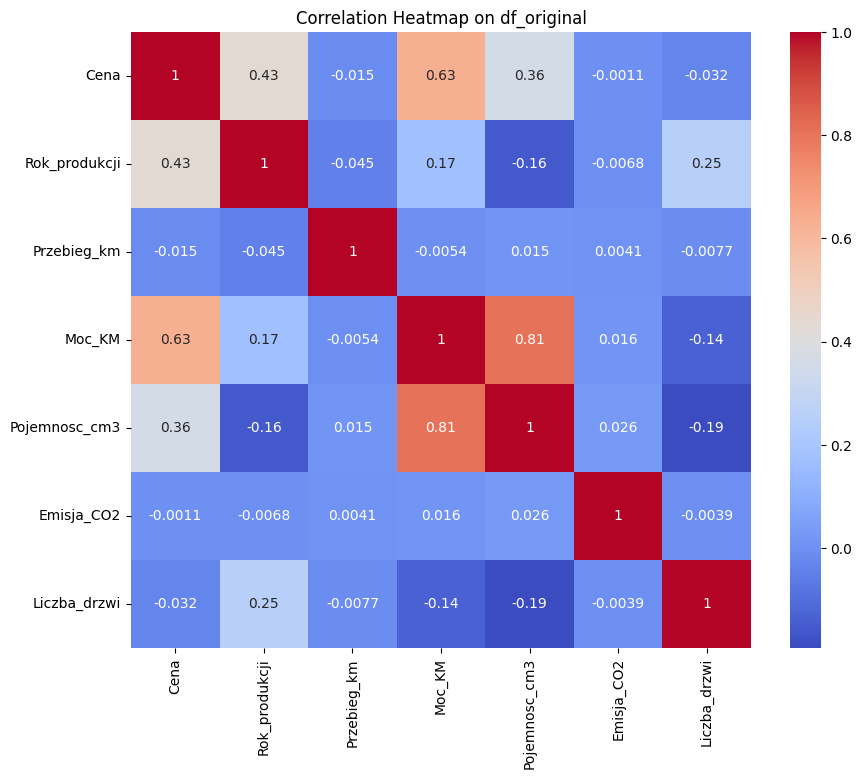

In [6]:
correlation_matrix = df_original[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap on df_original')
plt.savefig('Correlation_df_original.png')
plt.show()

### df_mostlyai
This correlation heatmap on `df_mostlyai` shows that there are essentially no meaningful relationships among the variables (all correlation values are close to zero). Therefore, I decided not to use this dataset for further analysis.

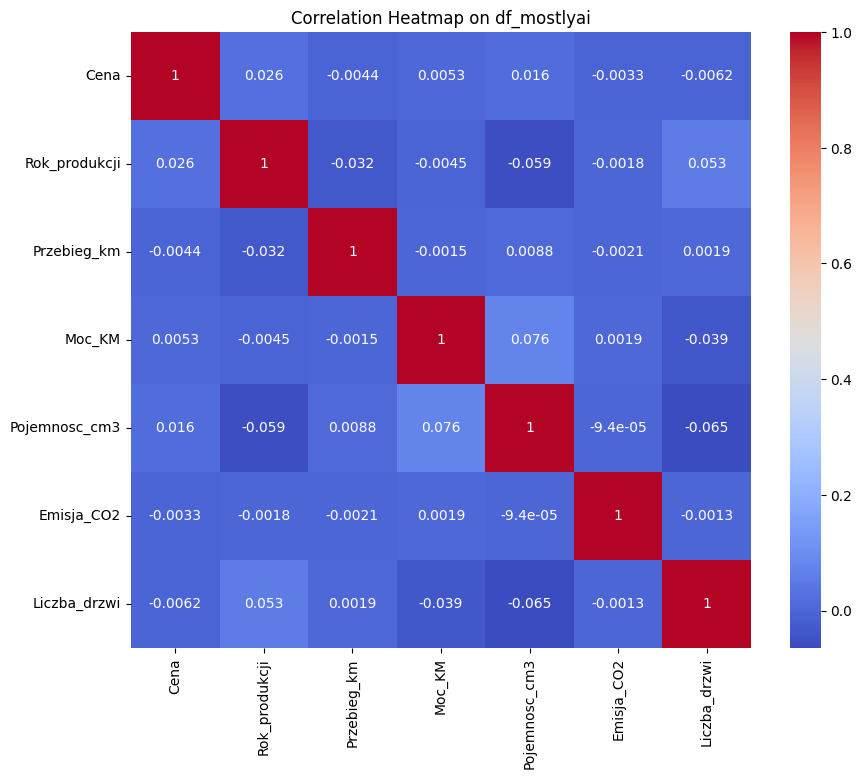

In [7]:
correlation_matrix = df_mostlyai[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap on df_mostlyai')

plt.savefig('Correlation_df_mostlyail.png')
plt.show()

### df_sdv
We decided not to use this dataset because, although there are correlations among the features, it contains certain `Marka_pojazdu`, `Model_pojazdu`, and `Generacja_pojazdu` combinations that do not actually occur in reality.








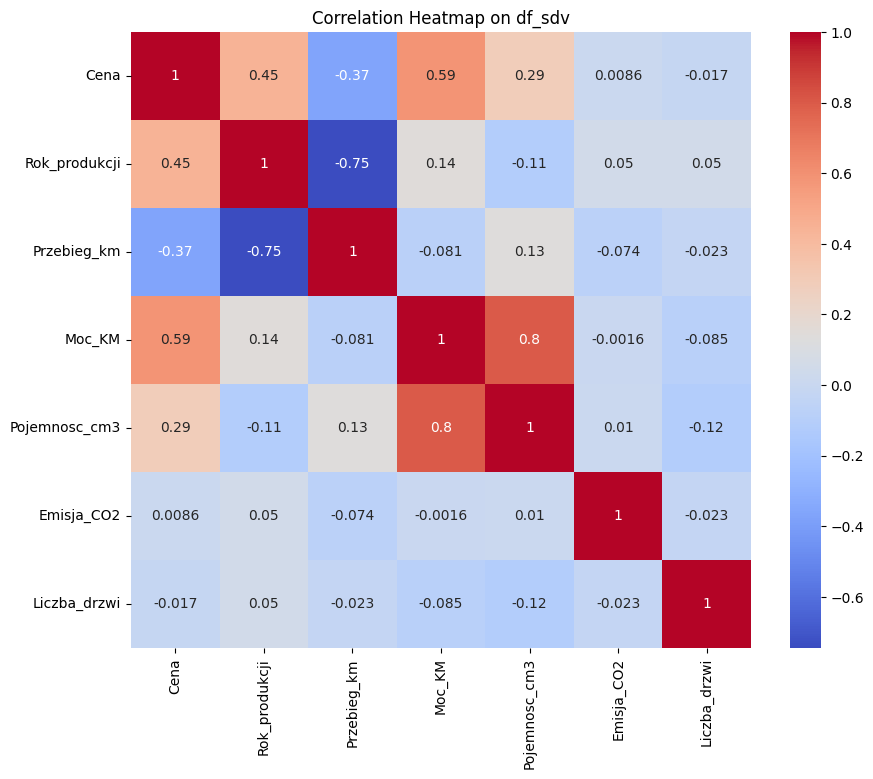

In [8]:
correlation_matrix = df_sdv[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap on df_sdv')

plt.savefig('Correlation_df_sdvl.png')
plt.show()

### df_original `Cena` distribution
By applying the logarithm to the price variable, the distribution becomes more symmetric and closer to a normal shape, as shown in the histogram with its density curve. However, the boxplot still reveals some outliers, indicating that certain vehicles remain significantly cheaper or more expensive than most.

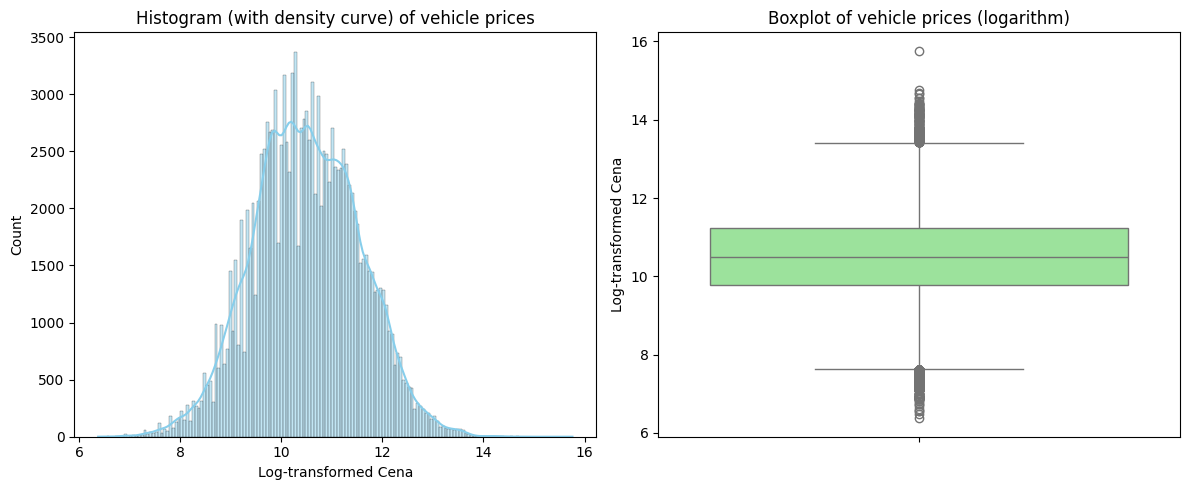

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_original['Cena']), kde=True, color='skyblue')
plt.title("Histogram (with density curve) of vehicle prices")
plt.xlabel("Log-transformed Cena")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df_original['Cena']), color='lightgreen')
plt.title("Boxplot of vehicle prices (logarithm)")
plt.ylabel("Log-transformed Cena")

plt.tight_layout()
plt.savefig('Histogram_Boxplot_prices.png')
plt.show()

### df_original `Cena` vs. `Przebieg_km`
The scatter plot shows a negative relationship between `Cena` and `Przebieg_km`, as mileage increases, the vehicle’s price generally decreases.

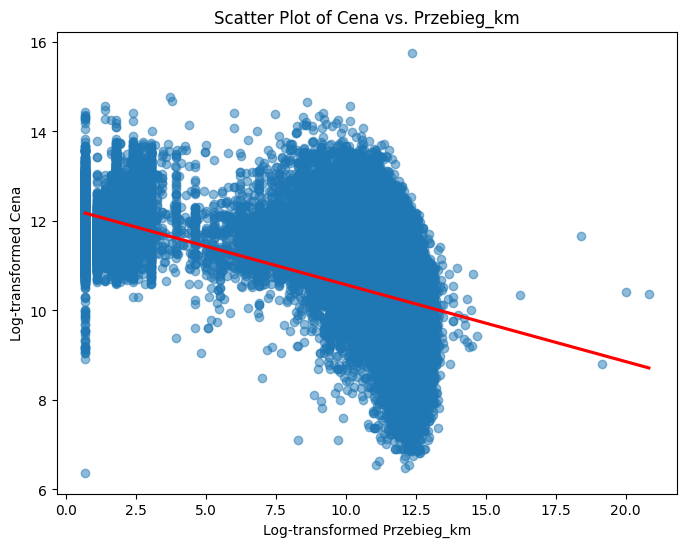

In [10]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=np.log1p(df_original['Przebieg_km']),
    y=np.log1p(df_original['Cena']),
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Scatter Plot of Cena vs. Przebieg_km")
plt.xlabel("Log-transformed Przebieg_km")
plt.ylabel("Log-transformed Cena")

plt.savefig('Scatter_Cena_vs_Przebieg_km.png')
plt.show()

### `Cena` vs. `Rok_produkcji` Analysis
For vehicles produced after 1990, there is a clear positive correlation between `Rok_produkcji` and `Cena`, cars tend to command higher prices. However, for vehicles produced before 1980, this relationship is not evident, likely because many of these cars are considered __antiques__ and can appreciate in value rather than follow typical depreciation trends.

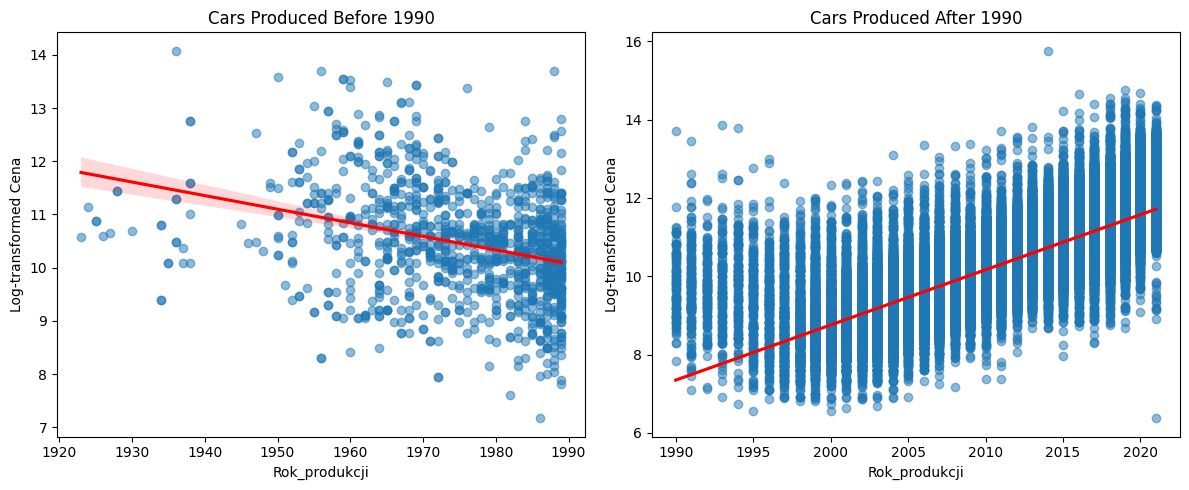

In [11]:
df_old = df_original[df_original['Rok_produkcji'] < 1990]
df_new = df_original[df_original['Rok_produkcji'] >= 1990]

plt.figure(figsize=(12, 5))

# produced before 1990
plt.subplot(1, 2, 1)
sns.regplot(
    x=df_old['Rok_produkcji'],
    y=np.log1p(df_old['Cena']),
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Cars Produced Before 1990")
plt.xlabel("Rok_produkcji")
plt.ylabel("Log-transformed Cena")

# produced after 1990
plt.subplot(1, 2, 2)
sns.regplot(
    x=df_new['Rok_produkcji'],
    y=np.log1p(df_new['Cena']),
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Cars Produced After 1990")
plt.xlabel("Rok_produkcji")
plt.ylabel("Log-transformed Cena")

plt.tight_layout()
plt.savefig('Scatter_Cena_vs_Rok_produkcji.png')
plt.show()

The boxplot further shows that cars produced from 1990 generally have higher median log-transformed prices, while vehicles from before 1980 can also command substantial value—likely due to their antique or collector status.

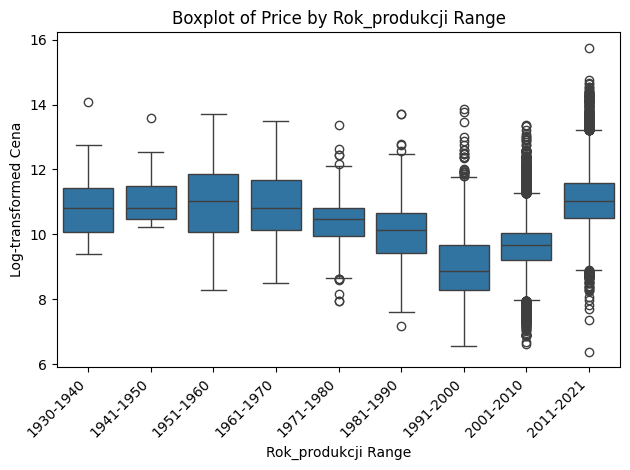

In [12]:
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2021]
labels = ['1930-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980',
          '1981-1990', '1991-2000', '2001-2010', '2011-2021']

df_original_plot = df_original.copy()

df_original_plot['Year_Range'] = pd.cut(df_original_plot['Rok_produkcji'], bins=bins, labels=labels)

sns.boxplot(
    x=df_original_plot['Year_Range'],
    y=np.log1p(df_original_plot['Cena'])
)
plt.title("Boxplot of Price by Rok_produkcji Range")
plt.xlabel("Rok_produkcji Range")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Log-transformed Cena")

plt.tight_layout()
plt.savefig('Boxplot_Price_Rok_produkcji.png')
plt.show()

### Distributions of `Moc_KM` and `Pojemnosc_cm3`
Most vehicles cluster around moderate power and capacity values, indicating common engine configurations.

There are a few extremely high values in both distributions, which warrant further investigation to verify their accuracy.

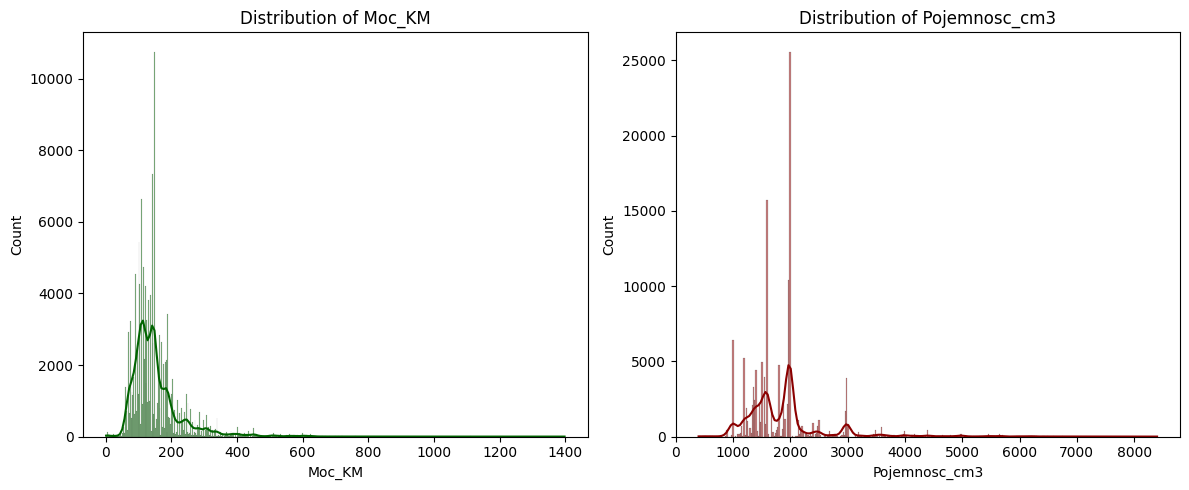

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_original['Moc_KM'], kde=True, color='darkgreen')
plt.title("Distribution of Moc_KM")
plt.xlabel("Moc_KM")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df_original['Pojemnosc_cm3'], kde=True, color='darkred')
plt.title("Distribution of Pojemnosc_cm3")
plt.xlabel("Pojemnosc_cm3")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig('Distribution_MocKM_and_Pojemnosc_cm3.png')
plt.show()

### Relationship between `Pojemnosc_cm3` and `Moc_KM`
There is a clear positive relationship, as engine capacity increases, engine power generally goes up.

Several points lie far from the main cluster, indicating outliers that do not fit the typical trend and may require further investigation.

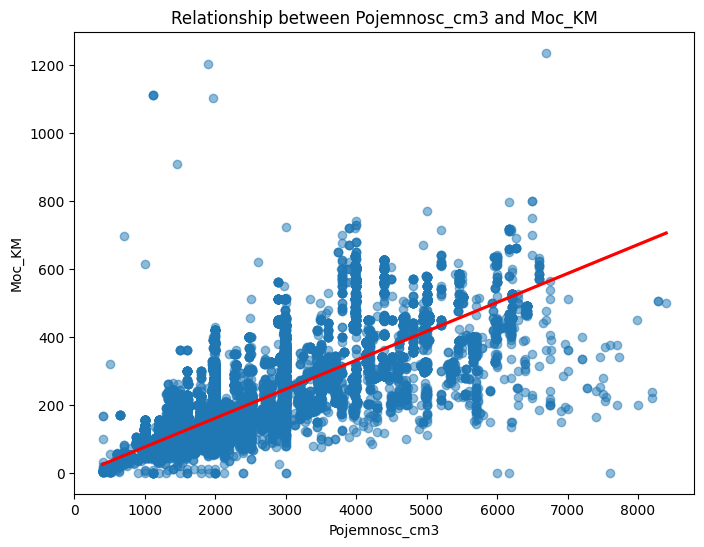

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=df_original['Pojemnosc_cm3'],
    y=df_original['Moc_KM'],
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Relationship between Pojemnosc_cm3 and Moc_KM")
plt.xlabel("Pojemnosc_cm3")
plt.ylabel("Moc_KM")

plt.savefig('Scatter_Pojemnosc_cm3_to_Moc_KM.png')
plt.show()

In [15]:
def plot_top_models_barplot(df, column, top_n=20):
    model_counts = df[column].value_counts().head(top_n)
    model_counts_df = model_counts.reset_index()
    model_counts_df.columns = [column, 'Count']
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=model_counts_df,
        x=column,
        y='Count',
        hue=column,
        palette='crest',
        legend=False
    )
    plt.title(f"Top {top_n} {column} by Frequency")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig(f'20_most_popular_{column}.png')
    plt.show()

###  Top 20 Car Brands by Frequency
The distribution of brands suggests that the dataset is dominated by a popular manufacturers, while other brands appear less frequently.

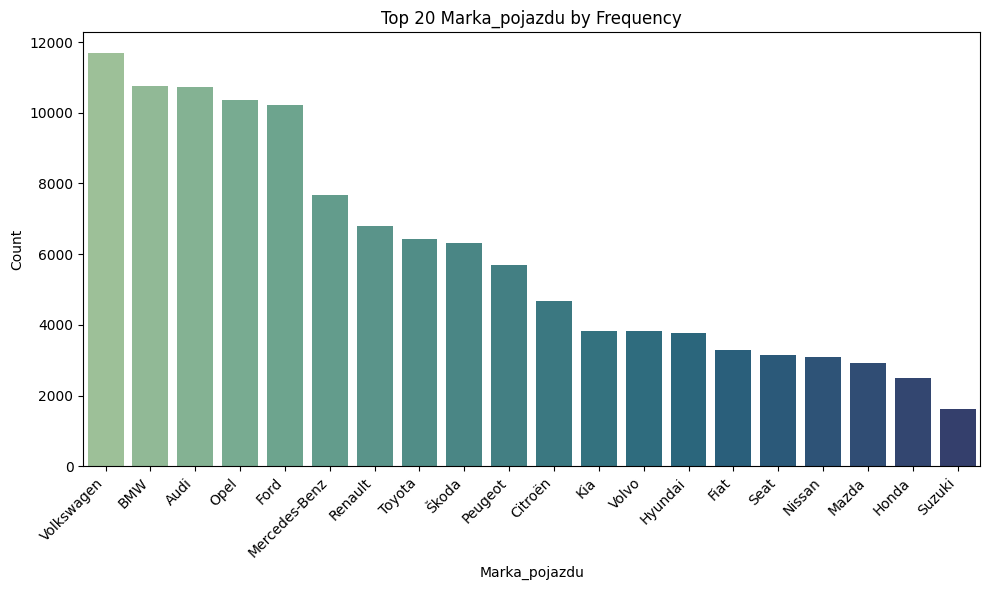

In [16]:
plot_top_models_barplot(df_original, 'Marka_pojazdu')

###  Top 20 Car Models by Frequency

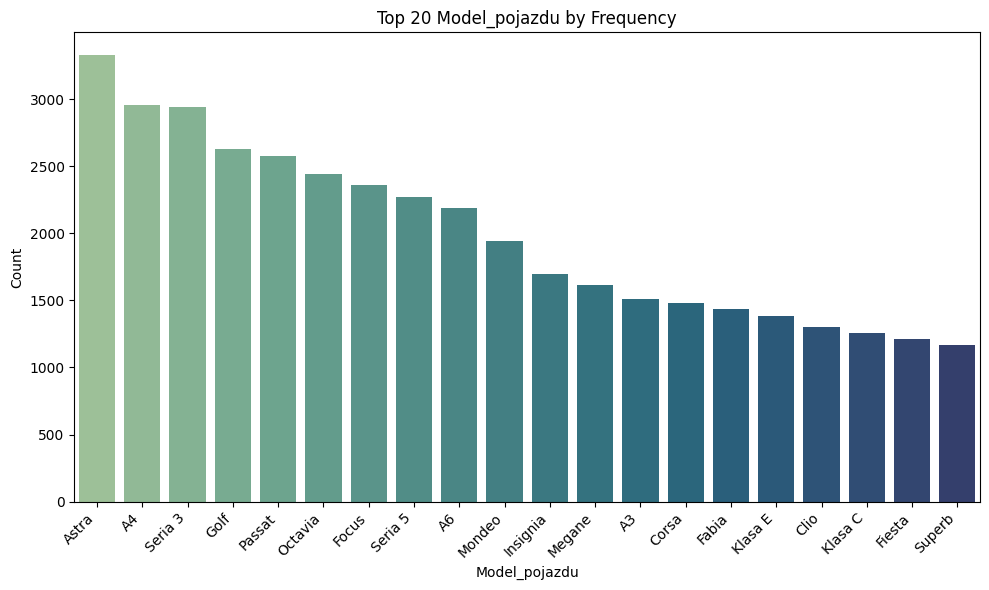

In [17]:
plot_top_models_barplot(df_original, 'Model_pojazdu')

### Countplots of Categorical Features
Categorical columns used: `Waluta`, `Stan`, `Rodzaj_paliwa`, `Naped`, `Skrzynia_biegow`, `Typ_nadwozia`, `Liczba_drzwi`, `Kolor`

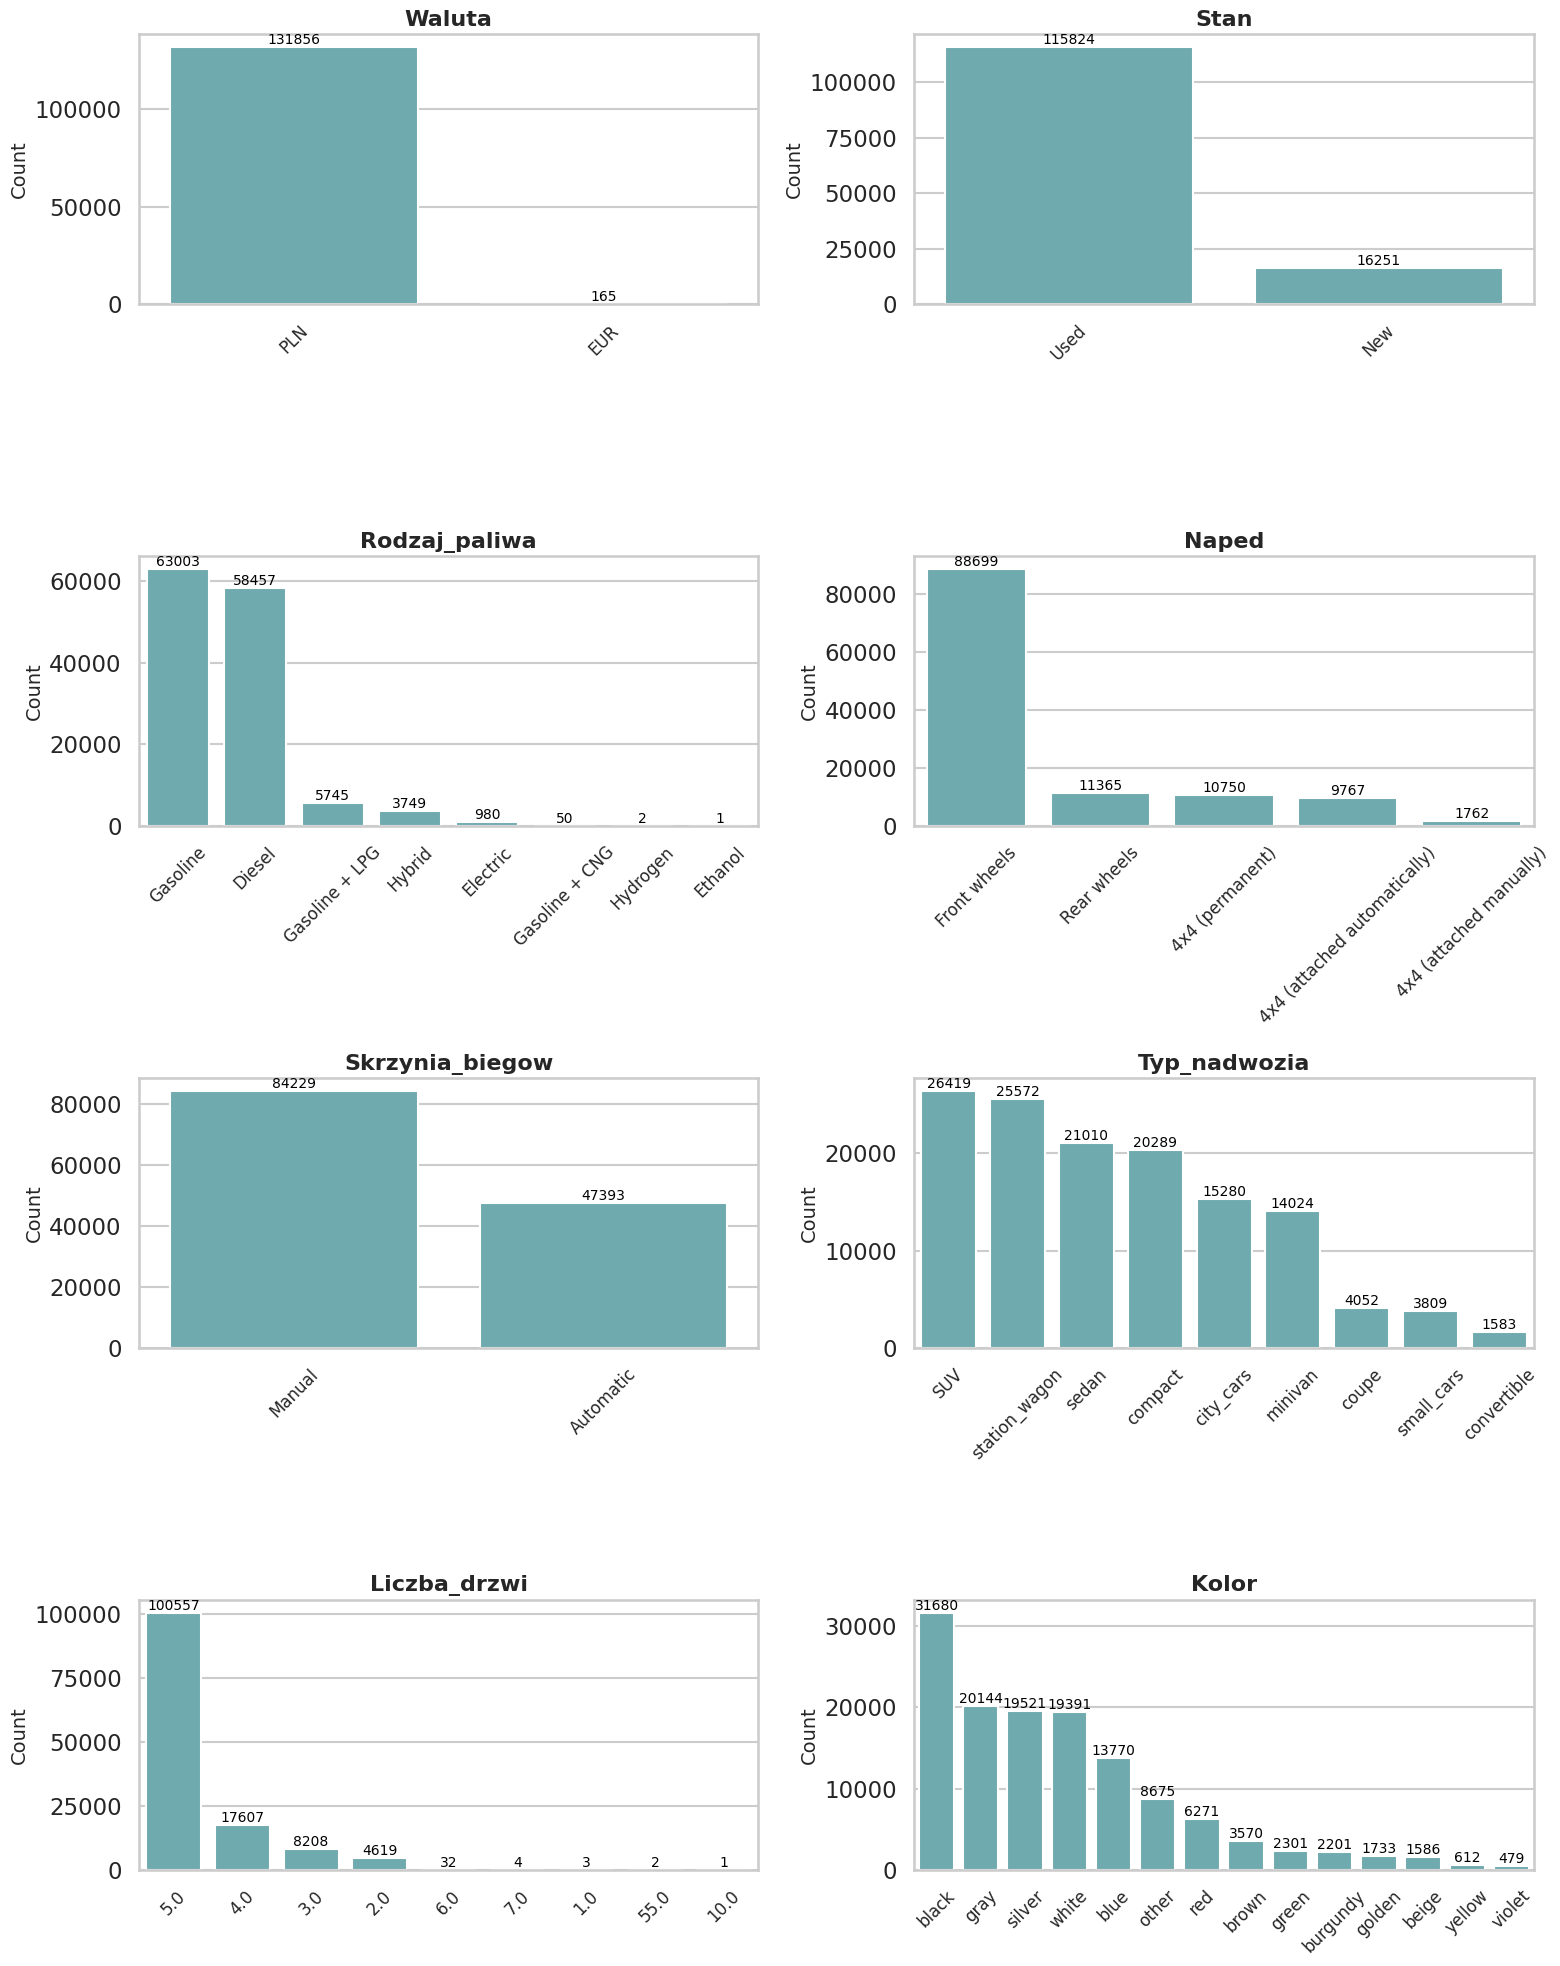

In [18]:
sns.set_theme(style="whitegrid", context="talk")

num_plots = len(categorical_columns)
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5), squeeze=False)
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]

    order = df_original[column].value_counts().index
    sns.countplot(x=column, data=df_original, order=order, ax=ax, saturation=0.9, color="#6badb2")

    # Add count on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

    ax.set_title(f'{column}', fontsize=16, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.savefig(f'Countplot_of_categorical_features.png')
plt.show()

### Boxplots Illustrating the Relationship between Categorical Features and Price `Cena`
Categorical columns used: `Waluta`, `Stan`, `Rodzaj_paliwa`, `Naped`, `Skrzynia_biegow`, `Typ_nadwozia`, `Liczba_drzwi`, `Kolor`


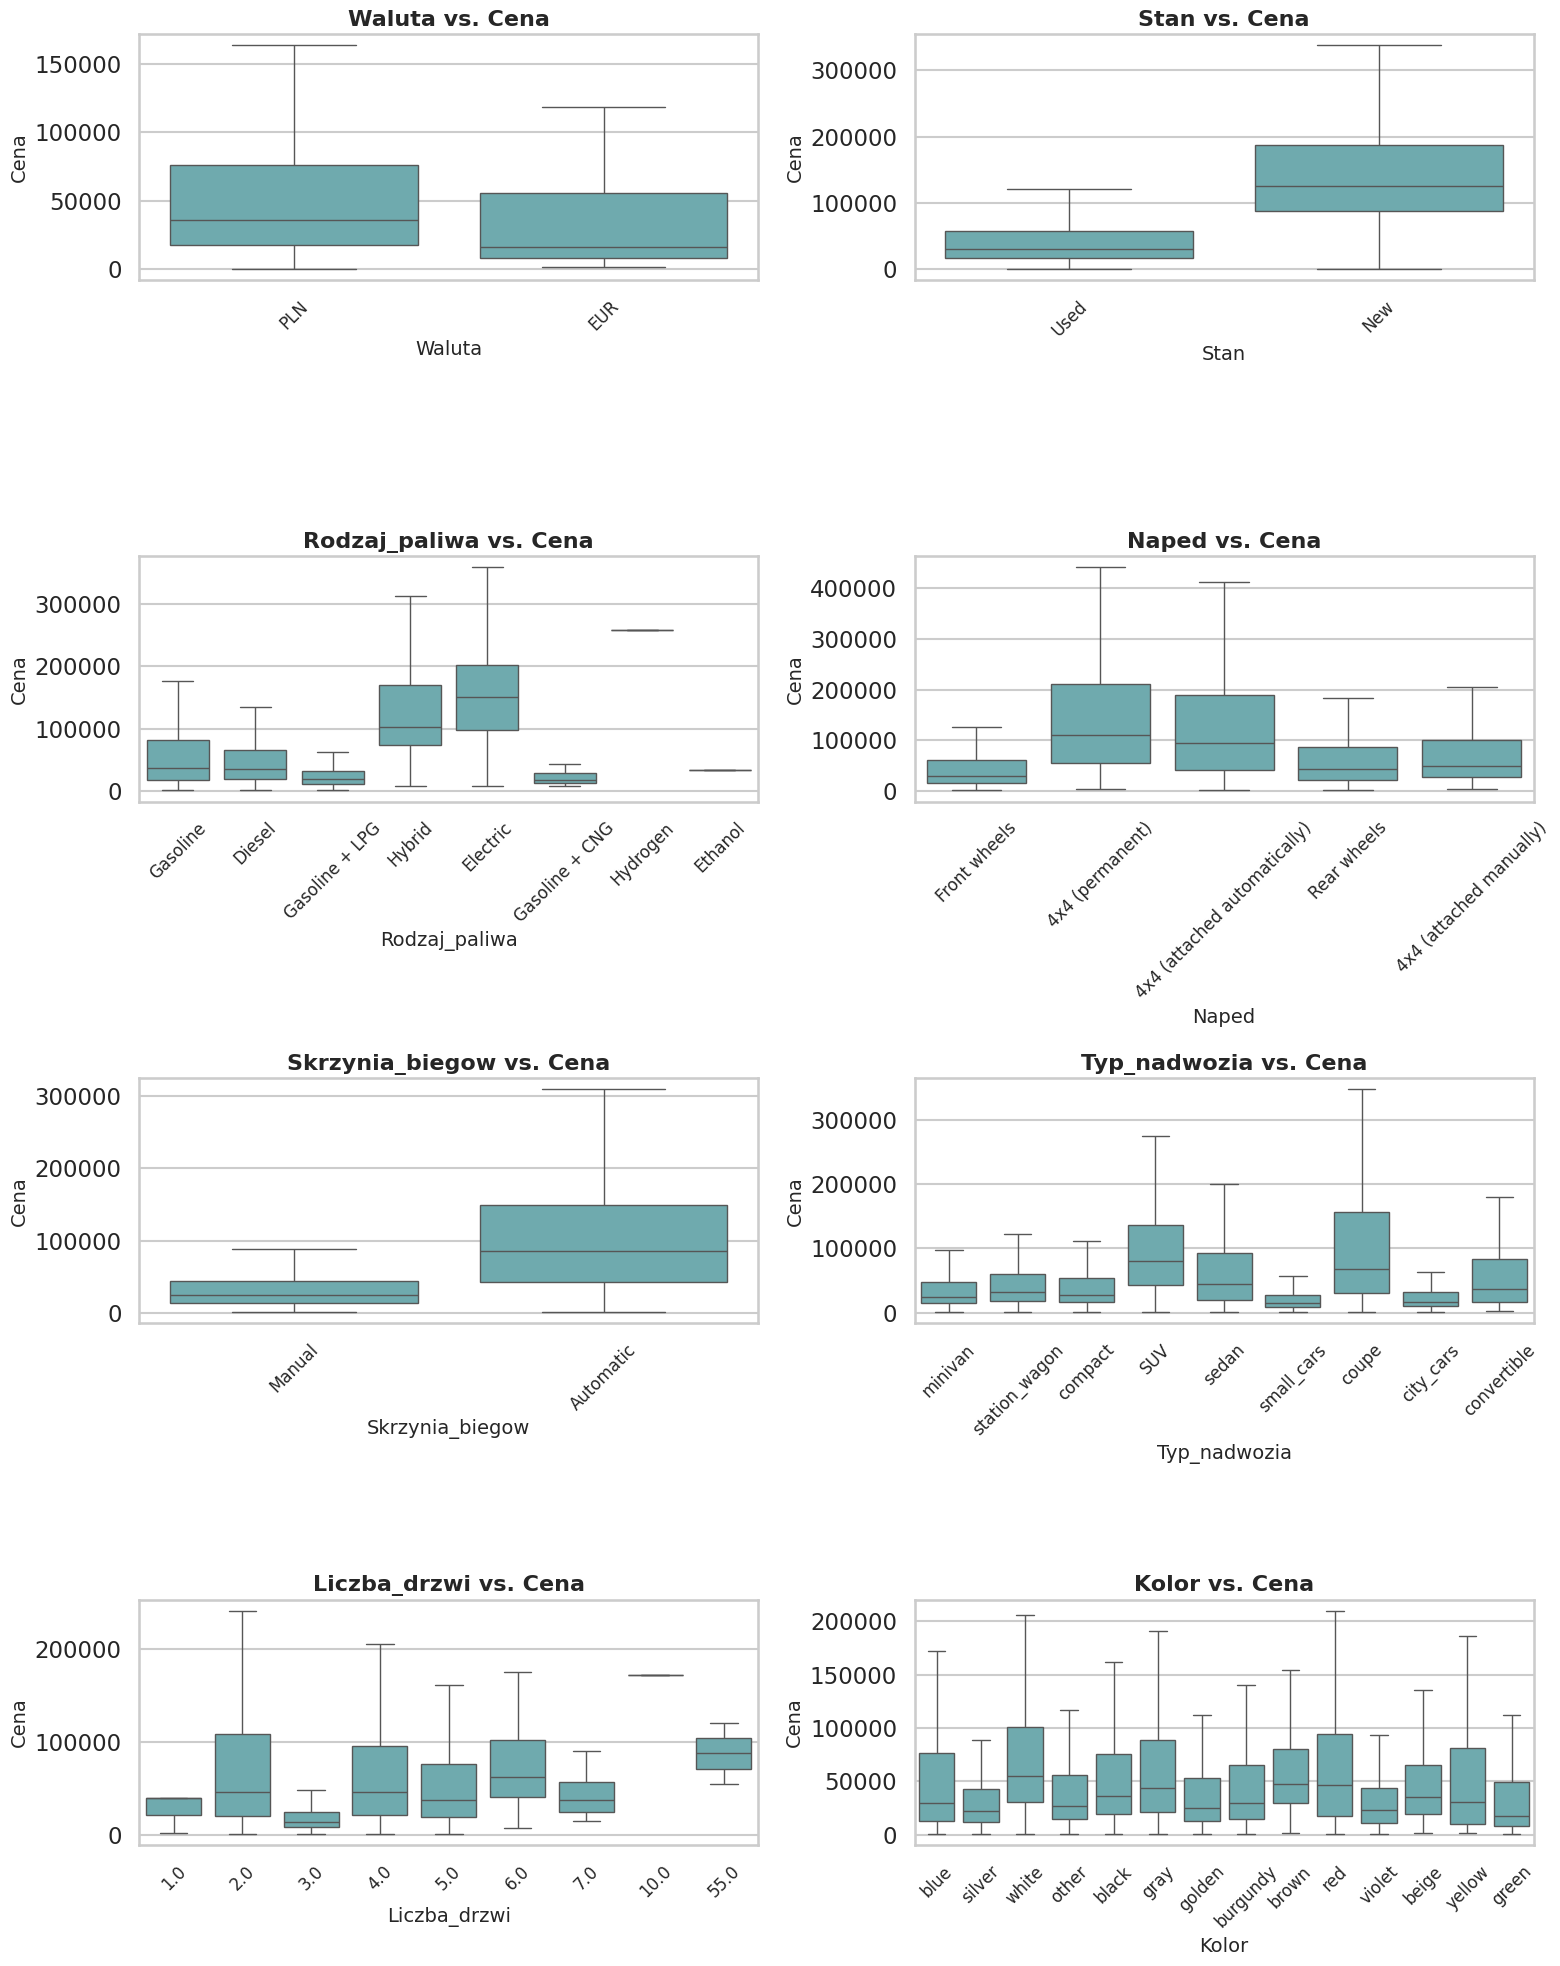

In [19]:
sns.set_theme(style="whitegrid", context="talk")

n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5), squeeze=False)
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.boxplot(
        data=df_original,
        x=column,
        y='Cena',
        showfliers=False,  # Hide outliers for clarity
        saturation=0.9,
        ax=ax,
        color="#6badb2"
    )

    ax.set_title(f'{column} vs. Cena', fontsize=16, weight='bold')
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Cena', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.savefig(f'Boxplots_Relationship_Price_Categorical_Features.png')
plt.show()

###  Impact of Additional Equipment `Wyposazenie` on Vehicle Price `Cena`
This bar chart displays the average price difference between vehicles with a specific feature and those without it.

For each feature, the average price is calculated for cars that have the feature and for cars that do not. The difference is computed as average price for vehicles with the feature minus average price for vehicles without the feature.

A positive value indicates that vehicles with the feature are, on average, more expensive, while a negative value suggests they are less expensive.

In [20]:
equipment_features = ["ABS", "Central locking", "Electric front windows", "Drivers airbag",
                      "Power steering", "Passengers airbag", "Electrically adjustable mirrors",
                      "Factory radio", "Immobilizer", "On-board computer", "ESP(stabilization of the track)",
                      "Alloy wheels", "CD", "ASR (traction control)", "Multifunction steering wheel",
                      "Automatic air conditioning", "Isofix", "Front side airbags", "Fog lights",
                      "Electric rear windows", "Cruise control", "Heated side mirrors", "Air curtains",
                      "Rear parking sensors", "Bluetooth", "Rain sensor", "Alarm", "Daytime running lights",
                      "Twilight sensor", "USB socket", "AUX socket", "MP3", "Dual zone air conditioning",
                      "Electrochromic rear view mirror", "Heated front seats", "Tinted windows", "GPS navigation",
                      "Front parking sensors", "LED lights", "Start-Stop system", "Rear side airbags", "Roof rails",
                      "Manual air conditioning", "Electrochromic side mirrors", "Velor upholstery", "Leather upholstery",
                      "Rear view camera", "Airbag protecting the knees", "Speed limiter", "Electrically adjustable seats",
                      "SD socket", "Xenon lights", "Lane assistant", "Heated windscreen", "Parking assistant", "Hook",
                      "Blind spot sensor", "Shift paddles", "Active cruise control", "DVD player", "Sunroof",
                      "Panoramic roof", "CD changer", "Adjustable suspension", "Heated rear seats",
                      "Four-zone air conditioning", "HUD(head-up display)", "Aftermarket radio", "Auxiliary heating", "nan", "TV tuner"]

In [21]:
df_original_wyposazenie = df_original.copy()

df_original_wyposazenie["Wyposazenie"] = df_original_wyposazenie["Wyposazenie"].astype(str)
df_original_wyposazenie["Wyposazenie"] = df_original_wyposazenie["Wyposazenie"].str.replace(r"[\[\]']", "", regex=True)

feature_counts = {}
for features in df_original_wyposazenie["Wyposazenie"].str.split(", "):
    for feature in features:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1


feature_counts_df = pd.DataFrame(list(feature_counts.items()), columns=["Wyposażenie", "Counts"])
feature_counts_df = feature_counts_df.sort_values(by="Counts", ascending=False)

encoded_features_original = pd.DataFrame(0, index=df_original_wyposazenie.index, columns=feature_counts_df["Wyposażenie"])


for index, row in df_original_wyposazenie.iterrows():
    features = row["Wyposazenie"].split(", ")
    for feature in features:
        if feature in encoded_features_original.columns:
            encoded_features_original.at[index, feature] = 1

df_original_wyposazenie_encoded = pd.concat([df_original_wyposazenie.drop(columns=["Wyposazenie"]), encoded_features_original], axis=1)

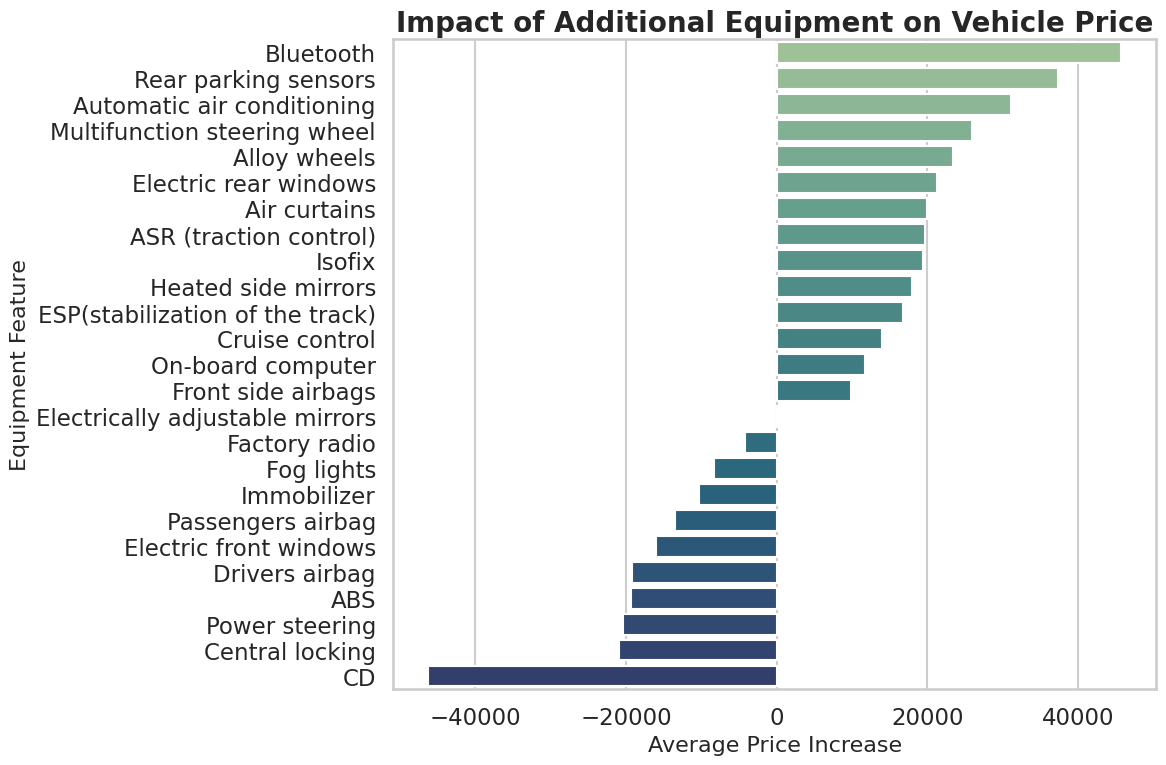

In [22]:
available_features = [feat for feat in equipment_features if feat in df_original_wyposazenie_encoded.columns]

feature_frequency = {feat: df_original_wyposazenie_encoded[feat].sum() for feat in available_features}

# top 20
sorted_features = sorted(feature_frequency.items(), key=lambda x: x[1], reverse=True)
top_features = [feat for feat, freq in sorted_features[:25]]

price_diffs = {}
for feature in top_features:
    price_with = df_original_wyposazenie_encoded.loc[df_original_wyposazenie_encoded[feature] == 1, 'Cena'].mean()
    price_without = df_original_wyposazenie_encoded.loc[df_original_wyposazenie_encoded[feature] == 0, 'Cena'].mean()
    price_diffs[feature] = price_with - price_without

price_diff_df = pd.DataFrame(list(price_diffs.items()), columns=['Feature', 'PriceIncrease'])
price_diff_df = price_diff_df.sort_values(by='PriceIncrease', ascending=False)

sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(12, 8))
sns.barplot(data=price_diff_df, x='PriceIncrease', y='Feature', hue=price_diff_df['Feature'], palette='crest')

plt.title("Impact of Additional Equipment on Vehicle Price", fontsize=20, weight='bold')
plt.xlabel("Average Price Increase", fontsize=16)
plt.ylabel("Equipment Feature", fontsize=16)

plt.tight_layout()
plt.savefig('Impact_of_Equipment_on_Price.png')
plt.show()

### Map of Poland: Average Vehicle Prices `Cena` by Region `Wojewodztwo`
This interactive map shows the average vehicle prices across Poland, broken down by region. The code first calculates the average price for each region from dataset, then overlays these values on a map using a GeoJSON file that outlines regional boundaries.

Regions with higher average prices are colored in darker tones, while those with lower prices are shown in lighter shades. This visualization helps you quickly see geographic trends in vehicle pricing across Poland.

In [23]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00


In [24]:
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [25]:
wojewodztwa = [
    "Dolnośląskie",
    "Kujawsko-pomorskie",
    "Lubelskie",
    "Wielkopolskie",
    "Lubuskie",
    "Łódzkie",
    "Małopolskie",
    "Mazowieckie",
    "Opolskie",
    "Zachodniopomorskie",
    "Podkarpackie",
    "Podlaskie",
    "Pomorskie",
    "Śląskie",
    "Świętokrzyskie",
    "Warmińsko-mazurskie"
]

wojewodztwa = [w.lower() for w in wojewodztwa]

def find_wojewodztwo(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    for woj in wojewodztwa:
        if woj in text:
            return woj
    return np.nan

df_original_lokalizacja = df_original.copy()
df_original_lokalizacja['Wojewodztwo'] = df_original_lokalizacja['Lokalizacja_oferty'].apply(find_wojewodztwo)

In [26]:
df_original_lokalizacja['Wojewodztwo'].nunique()

16

In [27]:
import folium

avg_prices = df_original_lokalizacja.groupby('Wojewodztwo')['Cena'].mean().reset_index()

geo_data = 'https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-medium.geojson'


m = folium.Map(location=[52.0, 19.0], zoom_start=6)
folium.Choropleth(
    geo_data=geo_data,
    data=avg_prices,
    columns=['Wojewodztwo', 'Cena'],
    key_on='feature.properties.nazwa',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Vehicle Price'
).add_to(m)

folium.LayerControl().add_to(m)

m.save('poland_vehicle_prices_map.html')
m

### Map of Poland: Count of Offers `Lokalizacja_oferty` by Wojewodztwo
This map displays the total number of vehicle listings across Poland, segmented by region. The code first computes the count of offers for each region from the dataset, then overlays these counts on a map using a GeoJSON file that defines the regional boundaries.

In [28]:
import folium

offer_counts = df_original_lokalizacja.groupby('Wojewodztwo').size().reset_index(name='Count')

geo_data = 'https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-medium.geojson'

m2 = folium.Map(location=[52.0, 19.0], zoom_start=6)

folium.Choropleth(
    geo_data=geo_data,
    data=offer_counts,
    columns=['Wojewodztwo', 'Count'],
    key_on='feature.properties.nazwa',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Listings'
).add_to(m2)

folium.LayerControl().add_to(m2)

m2.save('poland_vehicle_listings_map.html')
m2

### Comparison of New vs. Used Vehicle Prices `Cena` by Car Brand `Marka_pojazdu`
This grouped bar chart illustrates the average prices of new (blue bars) and used (red bars) vehicles for each car brand.

The chart helps highlight how much more (or less) expensive new vehicles are compared to used ones within each brand.

In [29]:
import plotly.express as px

df_brand = df_original.groupby(['Marka_pojazdu', 'Stan'])['Cena'].mean().reset_index()

fig = px.bar(
    df_brand,
    x='Marka_pojazdu',
    y='Cena',
    color='Stan',
    barmode='group',
    title="Comparison of New vs. Used Vehicle Prices (Cena) by Marka_pojazdu",
    labels={'Cena': 'Average Price (Avg Cena)', 'Marka': 'Brand', 'Stan': 'Condition'}
)

fig.update_layout(xaxis={'categoryorder': 'total descending'}, title_x=0.5)

fig.write_image("Comparison_new_vs_used_price.png")
fig.show()